# Scikit-Learn Tutorial

<p> ➤ Scikit-learn (Sklearn) is the most useful and robust library for machine learning in Python. It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python.</p>

In [1]:
# Importing Python Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl

## Section 1 - Plot a Graph

Text(0.5, 1.0, 'y=2x')

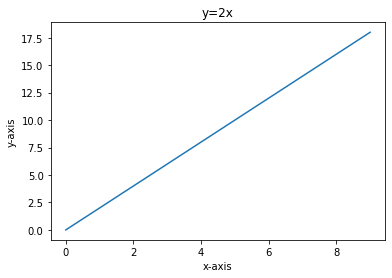

In [2]:
# Plotting a Basic Line Graph
x = [i for i in range(10)]
y = [2*i for i in range(10)]

plt.plot(x,y)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('y=2x')

Text(0.5, 1.0, 'Scatter Diagram')

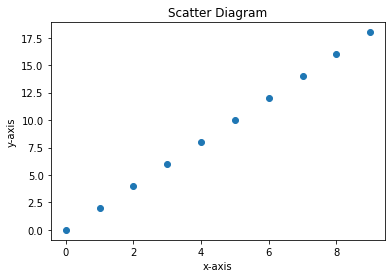

In [3]:
# Plotting a Scatter Graph
x = [i for i in range(10)]
y = [2*i for i in range(10)]

plt.scatter(x,y)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Scatter Diagram')

## Section 2 - Features and Labels

<p>
    ➤ Briefly, feature is input; label is output. This applies to both classification and regression problems. A feature is one column of the data in your input set. For instance, if you're trying to predict the type of pet someone will choose, your input features might include age, home region, family income, etc. The label is the final choice, such as dog, fish, iguana, rock, etc.
</p>
<ul>
    <li>For Features we use Upper Case X</li>
    <li>For Labels we use Lower Case y</li>
</ul>

## Section 3 - Save and Open a Model

In [4]:
import joblib

In [5]:
# Saving Model

# filename = 'model.sav'
# joblib.dump(model_name, filename)

In [6]:
# Loading or Opening a Model

# clf = joblib.open(filename)

## Section 4 - Classification

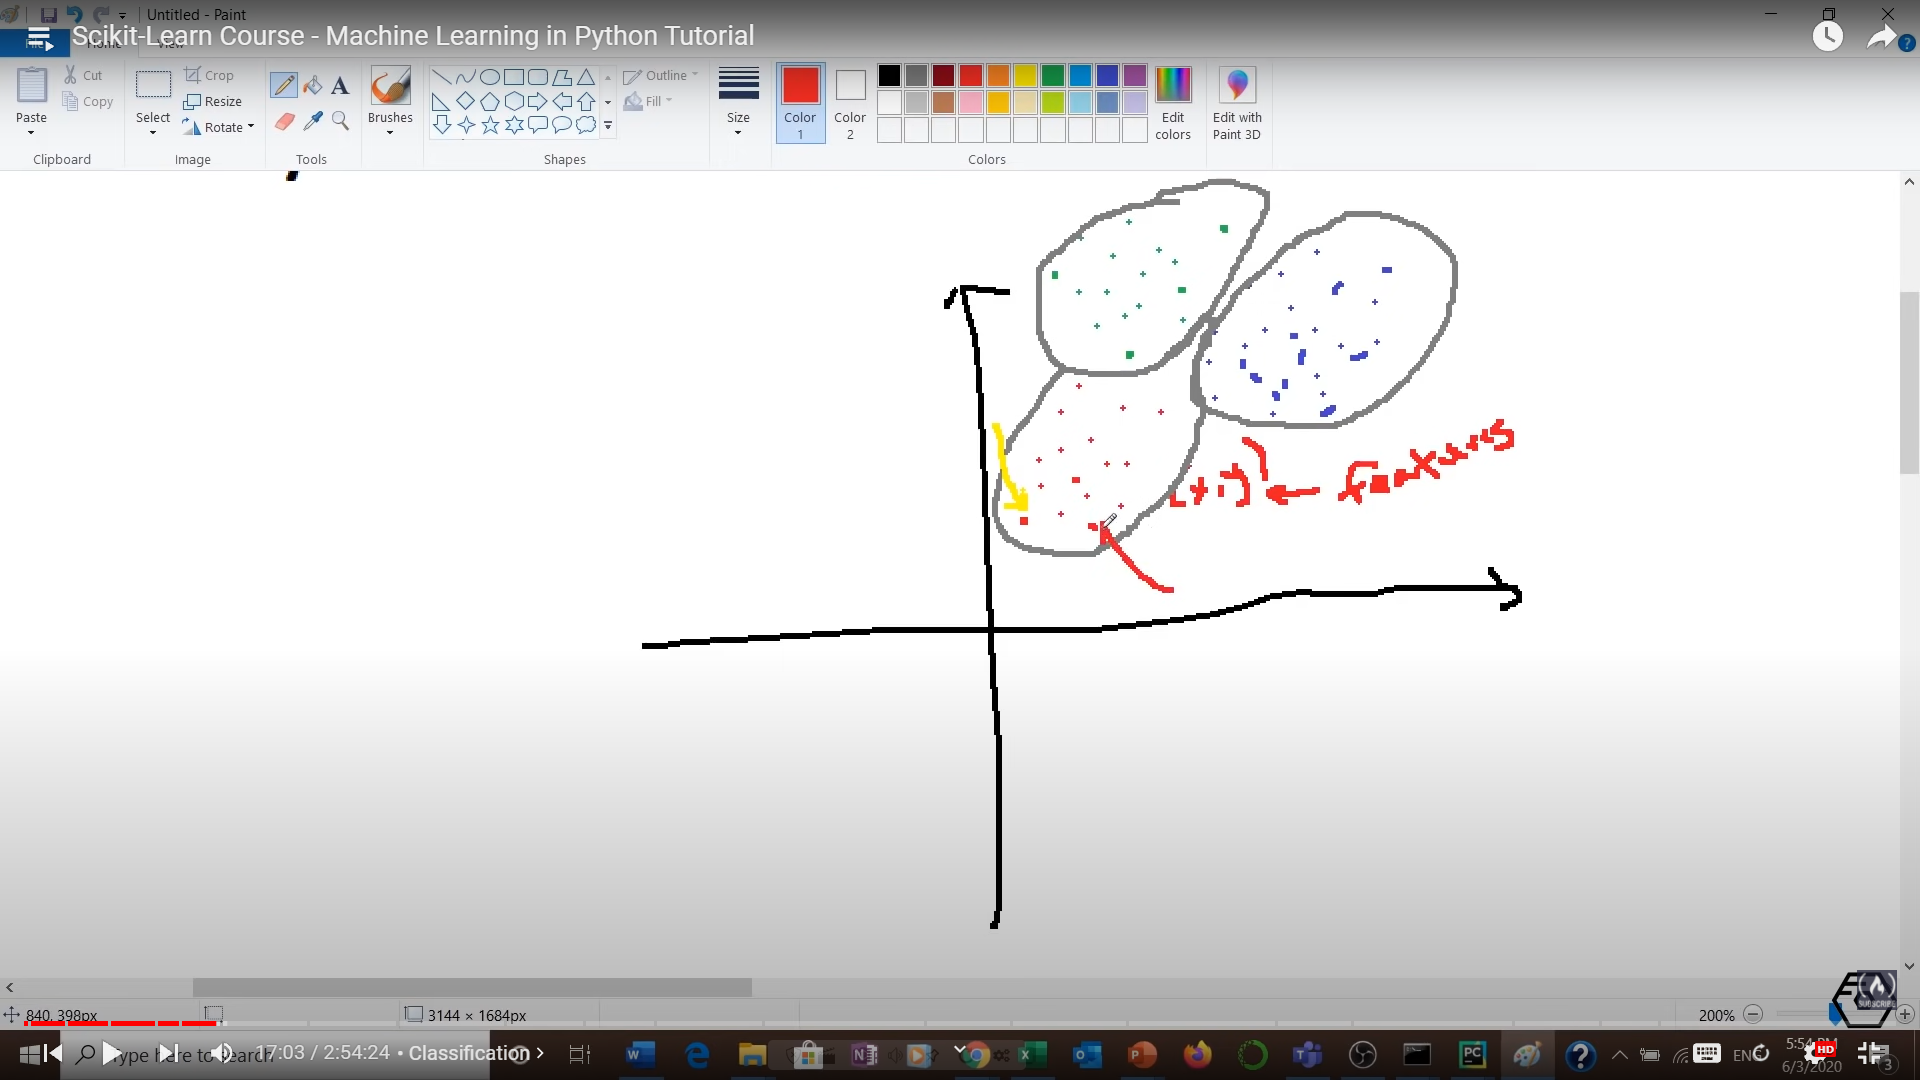

## Section 5 - Train Test Split

In [7]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [8]:
iris = datasets.load_iris()

In [9]:
# Splitting it in Features and Labels
X = iris.data
y = iris.target

print(X.shape, y.shape)

(150, 4) (150,)


In [10]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [11]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(127, 4) (23, 4) (127,) (23,)


## Section 6 - kNN Algorithm

In [12]:
from sklearn import neighbors, metrics
from sklearn.preprocessing import LabelEncoder

In [13]:
data = pd.read_csv('car.csv')

In [14]:
# Since our dataset doesn't contain the name of columns, the column names were assigned 
data.columns = ['Buying', 'Maint', 'Doors','Persons','LugBoot','Safety','Evaluation']

In [15]:
X = data[['Buying', 'Maint', 'Safety']].values
y = data[['Evaluation']]

print(X, y)

[['vhigh' 'vhigh' 'med']
 ['vhigh' 'vhigh' 'high']
 ['vhigh' 'vhigh' 'low']
 ...
 ['low' 'low' 'low']
 ['low' 'low' 'med']
 ['low' 'low' 'high']]      Evaluation
0         unacc
1         unacc
2         unacc
3         unacc
4         unacc
...         ...
1722       good
1723      vgood
1724      unacc
1725       good
1726      vgood

[1727 rows x 1 columns]


In [16]:
# Conversion of Data X
Le = LabelEncoder()
for i in range(len(X[0])):
    X[:,i] = Le.fit_transform(X[:,i])
9
print(X)

[[3 3 2]
 [3 3 0]
 [3 3 1]
 ...
 [1 1 1]
 [1 1 2]
 [1 1 0]]


In [17]:
# Conversion of Data y
label_mapping = {
    'unacc':0,
    'acc':1,
    'good':2,
    'vgood':3
}

y['Evaluation'] = y['Evaluation'].map(label_mapping)
y = np.array(y)
print(y)

[[0]
 [0]
 [0]
 ...
 [0]
 [2]
 [3]]


C:\Users\Admin\AppData\Local\Temp/ipykernel_6000/995060903.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Evaluation'] = y['Evaluation'].map(label_mapping)


In [18]:
# Create Model
knn = neighbors.KNeighborsClassifier(n_neighbors=25, weights='uniform')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

knn.fit(X_train, y_train)

prediction = knn.predict(X_test)

accuracy = metrics.accuracy_score(y_test, prediction)

print(prediction, accuracy)

[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 2 1 0 0
 0 0 1 0 1 1 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0
 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0
 1 0 0 0 0 1 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0
 0] 0.7423076923076923


c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [30]:
print("Actual Value: ", y[i])
print("Predicted Value: ", knn.predict(X)[i])

Actual Value:  [0]
Predicted Value:  0
